#### Experiment

Three ideas were tested:
1. Can we sort on the StarMine ARM and P/E ratio store daily
2. Try using the AdaBoost algo
3. Training years

#### Conclusions

1. No

2. Not good

3. More data is better

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.model_selection.score_vars import ScoreVariables
from ram.analysis.model_selection.pair_search import PairSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


In [3]:
run1 = RunManager('StatArbStrategy', 'run_0119', test_periods=0)
run2 = RunManager('StatArbStrategy', 'run_0120', test_periods=0)
run3 = RunManager('StatArbStrategy', 'run_0121', test_periods=0)
run4 = RunManager('StatArbStrategy', 'run_0122', test_periods=0)

In [4]:
run1.import_return_frame()
run2.import_return_frame()
run3.import_return_frame()
run4.import_return_frame()

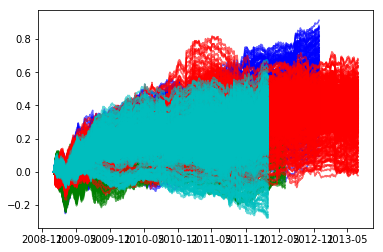

In [5]:
plt.figure()
plt.plot(run1.returns.dropna().cumsum(), 'b', alpha=0.6)
plt.plot(run2.returns.dropna().cumsum(), 'g', alpha=0.6)
plt.plot(run3.returns.dropna().cumsum(), 'r', alpha=0.6)
plt.plot(run4.returns.dropna().cumsum(), 'c', alpha=0.6)
plt.show()

In [6]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,1,224,0.507780,0.086801,-999.0
1,data_rank_flag,2,224,0.512478,0.088058,-999.0
2,holding_period,3,224,0.509473,0.085891,-999.0
3,holding_period,5,224,0.510785,0.088968,-999.0
4,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",224,0.540913,0.092899,-999.0
5,model,"{u'n_estimators': 50, u'type': u'ada'}",224,0.479345,0.081960,-999.0
6,per_side_count,10,224,0.567063,0.085144,-999.0
7,per_side_count,20,224,0.453195,0.089715,-999.0
8,response_days,5,448,0.510129,0.087430,-999.0
9,response_type,Simple,448,0.510129,0.087430,-999.0


In [7]:
run2.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,1,224,0.251521,0.044970,-999.0
1,data_rank_flag,2,224,0.254186,0.046693,-999.0
2,holding_period,3,224,0.273521,0.048797,-999.0
3,holding_period,5,224,0.232185,0.042866,-999.0
4,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",224,0.286192,0.052207,-999.0
5,model,"{u'n_estimators': 50, u'type': u'ada'}",224,0.219514,0.039456,-999.0
6,per_side_count,10,224,0.266786,0.042797,-999.0
7,per_side_count,20,224,0.238920,0.048866,-999.0
8,response_days,5,448,0.252853,0.045832,-999.0
9,response_type,Simple,448,0.252853,0.045832,-999.0


In [8]:
run3.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,1,224,0.355379,0.052428,-999.0
1,data_rank_flag,2,224,0.378451,0.055118,-999.0
2,holding_period,3,224,0.345283,0.049653,-999.0
3,holding_period,5,224,0.388547,0.057893,-999.0
4,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",224,0.358014,0.052694,-999.0
5,model,"{u'n_estimators': 50, u'type': u'ada'}",224,0.375816,0.054852,-999.0
6,per_side_count,10,224,0.368324,0.045033,-999.0
7,per_side_count,20,224,0.365506,0.062513,-999.0
8,response_days,5,448,0.366915,0.053773,-999.0
9,response_type,Simple,448,0.366915,0.053773,-999.0


In [9]:
run4.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,1,224,0.274276,0.056751,-999.0
1,data_rank_flag,2,224,0.262809,0.053986,-999.0
2,holding_period,3,224,0.299394,0.060612,-999.0
3,holding_period,5,224,0.237691,0.050125,-999.0
4,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",224,0.283651,0.059066,-999.0
5,model,"{u'n_estimators': 50, u'type': u'ada'}",224,0.253434,0.051671,-999.0
6,per_side_count,10,224,0.293349,0.053186,-999.0
7,per_side_count,20,224,0.243737,0.057551,-999.0
8,response_days,5,448,0.268543,0.055368,-999.0
9,response_type,Simple,448,0.268543,0.055368,-999.0
